In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import skimage
from skimage import exposure
from skimage import transform


# **(a) Problem set up:** 


## **Part a-i:** In this section I take the functions and define them so that they can be used later on. I had to modify the template command so that it would read in the images properly due to me using google colab.

In [ ]:
def create_template():
    import matplotlib.image as mpimg
    import numpy as np
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    template = np.zeros((36,42,24))
    for a in range(len(alphabet)):
        template[a,:] = mpimg.imread(alphabet[a]+'.tiff')
    return template

def corr2(A,B):
    import numpy as np
    A = A - A.mean()
    B = B - B.mean()
    R = np.sum(A*B)/np.sqrt(np.sum(A*A)*np.sum(B*B))
    return R

def match_chars(I,template):
    import numpy as np
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    num_chars = int(I.shape[1]/24)
    match_str = ''
    for s in range(num_chars):
        C = I[:,s*24:(s+1)*24];
        C[C<0] = 0;
        C[C>255] = 255;
        R_coeff = np.zeros((template.shape[0],1))
        for c in range(template.shape[0]):
            R_coeff[c] = corr2(template[c,:,:],C)
        r = np.argmax(R_coeff)
        match_str = match_str + alphabet[r]
    return match_str

## ***Part a-ii:*** In this section I define the function that takes a string A and outputs an image that is the string stiched together. The main trick is creating an empty image that is 42 by 24 times the amount of letters in the string. From there I sectioned off the empty matrix and placed in the letters using the ranges that each of the letters occupies.

In [ ]:
def text_to_Im(A):
  Plate = np.zeros([len(A),42,24])
  alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

  for i in range(0,len(A)):
    for j in range(0,len(alphabet)):
      if (A[i] == alphabet[j]):
        Plate[i]=template[j]
  image=np.zeros([42,len(A)*24])
  for i in range(0,len(A)):
    image[0:42,i*24:(i+1)*24] = Plate[i]
  return image


## ***Part a-iii:*** In this section I take the command I wrote and entered in my string. My last name starts with O, which looks simular 0 so I changed it to J to avoid errors in the future.

Text(0.5, 1.0, 'Licence Plate')

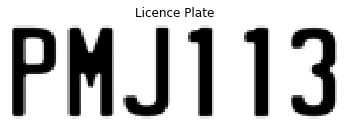

In [ ]:
template =  create_template()
string='PMJ113'
A = text_to_Im(string)
img=plt.imshow(A, cmap='gray'); plt.axis('off')
plt.title("Licence Plate")


My licence plate looks correct.

## ***Part a-iv:*** In this section I test the accuracy of my plate by using the given letter detection function. 

In [ ]:
match_str= match_chars(A,template)
my_str = 'PMJ113'
acc=float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str)

print("Accuracy= ",np.round(100*acc,2),"%")

Accuracy=  100.0 %


The function produced a string that was exactly the same as the input, and after testing with a given command, the strings are 1:1.

# **b) Effect of effective spatial resolution of the image:**

## ***Part b-i:*** In this section I take the orignal image and degrade it by shrinking it and resizing it using skimage.transform.resize. The problem states that sr = 30, so that is the factor that I use to modify the image.


Shrunk =  30 x 103
Degraded =  42 x 144


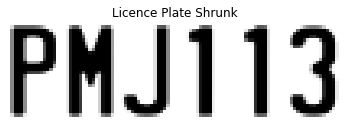

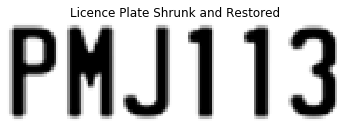

In [ ]:
eff_sr=np.arange(42,0,-1)
sr = 30
A_shrunk=skimage.transform.resize(A,(sr,np.round(sr/42*144).astype(int)),order=3)
A_degraded=skimage.transform.resize(A_shrunk,(42,144),order=3)
plt.title("Licence Plate Shrunk")
img=plt.imshow(A_shrunk, cmap='gray'); plt.axis('off')
plt.figure()
plt.title("Licence Plate Shrunk and Restored")
img=plt.imshow(A_degraded, cmap='gray'); plt.axis('off')
print("Shrunk = ",len(A_shrunk),"x", len(A_shrunk[0])) 
print("Degraded = ",len(A_degraded),"x", len(A_degraded[0]))


The output of the images look good and the proper dimensions were produced when printing the length.

## ***Part b-ii:*** In this seciton I find the Mean Squared Error and plot it by the factor that the image was scaled. I subtracted 42 by i so that the MSE would come out in the range 0:42.

Text(0, 0.5, 'MSE')

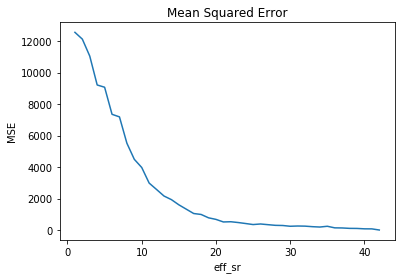

In [ ]:
eff_sr=np.arange(42,0,-1)
MSE = np.zeros(len(eff_sr))
N = 42
M= 144
for i in range(0,len(eff_sr)):
  sr = eff_sr[i]
  A_shrunk=skimage.transform.resize(A,(sr,np.round(sr/42*144).astype(int)),order=3)
  A_degraded=skimage.transform.resize(A_shrunk,(42,144),order=3)
  MSE[41-i] = np.sum((A_degraded-A)**2)/(N*M)




plt.plot(np.arange(1,43),MSE)
plt.title("Mean Squared Error")
plt.xlabel("eff_sr")
plt.ylabel("MSE")

From the plot above I can see that the MSE decreases as the number of rows sr increases. This makes sense, a value like 3 means that the image was shrunk down and degraded by a factor of 3/42, where as at 42 it is scaled by a factor of 42/42 or 1, which is just the orginal image. A smaller MSE means that the two images are more similar and a large MSE means they are more different.

## ***Part b-iii:*** In this section I take the OCR and plot it against the factor that the image was scaled. I had the same approach as before to make sure that the plots were in order.

Text(0, 0.5, 'OCR(%)')

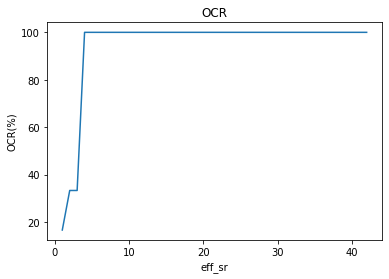

In [ ]:
eff_sr=np.arange(42,0,-1)
MSE = np.zeros(len(eff_sr))
N = 42
M= 144
my_str = 'PMJ113'
OCR = np.zeros(len(eff_sr))
for i in range(0,len(eff_sr)):
  sr = eff_sr[i]
  A_shrunk=skimage.transform.resize(A,(sr,np.round(sr/42*144).astype(int)),order=3)
  A_degraded=skimage.transform.resize(A_shrunk,(42,144),order=3)
  match_str= match_chars(A_degraded,template)
  OCR[41-i]=float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str)
  
plt.plot(np.arange(1,43),OCR*100)
plt.title("OCR")




plt.xlabel("eff_sr")
plt.ylabel("OCR(%)")

From the plot above I can see that the OCR increases the larger eff_sr becomes. This makes sense because the detection function would be able to detect the string better the less that the image is degraded. The plot follows this rule as a larger eff_sr means that the image is degraded less.

## ***Part b-iv:*** In this section I show three examples of what the degredation does to the image. I chose 20, 9, and 1 because they demostrate the effects the best. 


(-0.5, 143.5, 41.5, -0.5)

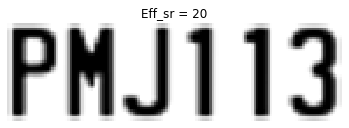

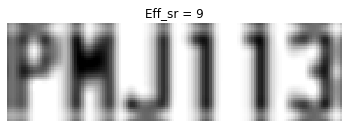

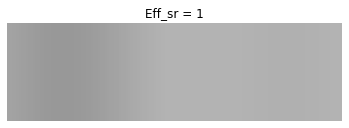

In [ ]:
plt.title("Eff_sr = 20")
sr = 20
A_shrunk=skimage.transform.resize(A,(sr,np.round(sr/42*144).astype(int)),order=3)
A_degraded=skimage.transform.resize(A_shrunk,(42,144),order=3)
img=plt.imshow(A_degraded, cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max); plt.axis('off')
plt.figure()
plt.title("Eff_sr = 9")
sr = 9
A_shrunk=skimage.transform.resize(A,(sr,np.round(sr/42*144).astype(int)),order=3)
A_degraded=skimage.transform.resize(A_shrunk,(42,144),order=3)
img=plt.imshow(A_degraded, cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max); plt.axis('off')
plt.figure()
plt.title("Eff_sr = 1")
sr = 1
A_shrunk=skimage.transform.resize(A,(sr,np.round(sr/42*144).astype(int)),order=3)
A_degraded=skimage.transform.resize(A_shrunk,(42,144),order=3)
img=plt.imshow(A_degraded, cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max); plt.axis('off')


The first value I chose was 20 because it is still very legiable but has a large amount of degredation around the edges. I belive that an eff_sr of 9 is the last point where I can confidently read the plate. When I reduce the image to 8 the M in my name gets muddled together and it is not obvious which letter it is, it looks like it could be an N or an H. I plotted an eff_sr of 1 to show how degraded the image becomes at that point. It is unreconizable due to the large amount of downscaling that occured.

## ***Part b-v:*** In this section I summarize my thoughts on license plate enhancement versus effective spatial resolution. I also provide the minimum eff_sr that the has an OCR of 100%. I did this by looping through the OCR vector and placing the index of a value that was below 100%, and anything above. With this solution the max value would occur at 1 after the max number in the index, so I added 1. Also, the index starts at zero but eff_sr starts at one so I needed to add another 1, hence maxeff100+2.

Earliest 100% Accuracy Occurs at eff_str =  4


<Figure size 432x288 with 0 Axes>

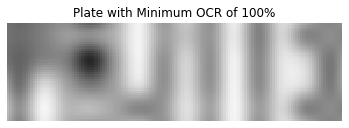

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.title("Plate with Minimum OCR of 100%")

index100 = np.zeros(len(eff_sr))
for j in range(len(eff_sr)):
  if ( np.round(OCR[j],2) != 1):
      index100[j]=j
  else:
      index100[j]=0
maxeff100 = np.max(index100) + 2
print("Earliest 100% Accuracy Occurs at eff_str = ",int(maxeff100))

sr = maxeff100
B = np.zeros([42,144])
A_shrunk=skimage.transform.resize(A,(sr,np.round(sr/42*144).astype(int)),order=3)
B=skimage.transform.resize(A_shrunk,(42,144),order=3)
img=plt.imshow(B, cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max); plt.axis('off')
plt.figure()



Summary: The plate can take a suprising amount of degredation and still be legiable. I think this is to do with the simplicity of the image, there are not many gray levels that can be corrupted, and the image is black on white. Changing the size ratio does leave the image degreded because each step the image size is reduced some of the information is lost. The minimum eff_str I found that produced an OCR of 100% was 4, and I printed it out above.

# **(c) Effect of intensity resolution of the image:**

## ***Part c-i:*** In this section I take B and scale it to only values [254,255]. I divided B by the full range 256 and multiplied by the desired range. I added back the minimum scaled value so that the range of B_degraded would be in the correct location in the range. I used B_temp because when I used B it changed the vaule and messup up previous and upcomming section when I rerun my code.

Max=  254.95419705953915
Min=  254.15534542639674


<Figure size 432x288 with 0 Axes>

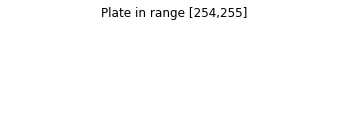

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.title("Plate in range [254,255]")
B_temp = B/256*(255-254)
B_degraded=B_temp+254

print("Max= ",np.max(B_degraded))
print("Min= ",np.min(B_degraded))

img=plt.imshow(B_degraded, cmap='gray',vmin=0,vmax=255); plt.axis('off')
plt.figure()


The Plate is a blank white image, which makes sense as the values exist between 254 and 255, which are the two brightess values. My eyes cannot distinguish a 1 level intensity change, so the plate just looks white to me. I also printed the min and max to ensure that the values were in the proper range.

## ***Part c-ii:*** In this section I find the MSE and compare it to the previous.

In [ ]:
MSE_W = np.sum((B_degraded-A)**2)/(N*M)
print("MSE of Plate = ", MSE_W)

MSE of Plate =  19596.149815145323


The MSE is much larger this time, by a factor of about 1.5x

## ***Part c-iii:*** In this section I find the accuracy of B_degraded.

In [ ]:
match_str= match_chars(B_degraded,template)

OCR_W=float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str)

print("OCR Accuracy = ",OCR_W*100,"%")

OCR Accuracy =  100.0 %


The OCR Matches the OCR of the image in part b.

## ***Part c-iv:*** The OCR is good because in the eyes of the function not much changed in the image. It is able to see the 1 level intesity changes because it is able to detect the intensity changes much better than the human eye. It is more so comparing numbers than actually "seeing" the image so scaling doesn't cause much of a difference.

## ***Part c-v:*** In this section I chose a K value that I can read the plate. I tried a couple of K values and landed on 150.

(-0.5, 143.5, 41.5, -0.5)

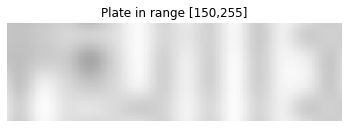

In [ ]:
K=150
C = B/255*(255-K)
C = C + K
plt.title("Plate in range [150,255]")

img=plt.imshow(C, cmap='gray',vmin=0,vmax=255); plt.axis('off')



I can see the plate because I know what I am looking for but it is not very clear. Any K higher I can't detect the edge of the letters.

# **(d) Effect of additive noise**

## ***Part d-i:*** In this section I plotted the MSE of additive noise with varying amounts of sigma. I did this by multiplying np.random by a vector of sigma values and took the MSE then plotted it against its sigma value.

128


Text(0, 0.5, 'MSE')

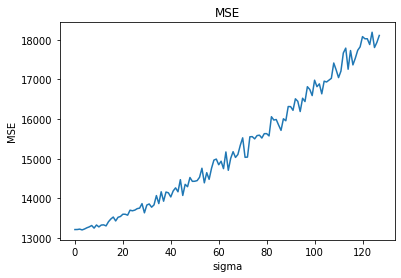

In [ ]:
N = 42
M= 144
sigma=np.arange(0,128)
MSE = np.zeros(len(sigma))
C_degraded=np.zeros([N,M])


for n in range(len(sigma)):
  C_degraded = C+sigma[n]*np.random.randn(N,M)
  C_degraded[C_degraded>255]=255
  C_degraded[C_degraded<0]=0
  MSE[n] = np.sum((C_degraded-A)**2)/(N*M)
  
plt.plot(np.arange(len(sigma)),MSE)
plt.title("MSE")
print(len(sigma))
plt.xlabel("sigma")
plt.ylabel("MSE")

From my plot I can see that adding more noise causes the MSE to increase. The plot starts at 13000, which makes sense because the image that noise is being added to is already pretty degraded from the orginal. The randomness of the noise can be seen by the wiggling of the plot, as different numbers are added and subtracted constantly.

## ***Part d-ii:*** In this section I find the OCR of off all of the different sigma values. I did this in a loop simular to the one above and entered the images into a seprate matrix. 

Max 83% Accuracy Occurs at Sigma =  78.0
Max 50% Accuracy Occurs at Sigma =  117.0


Text(0, 0.5, 'OCR(%)')

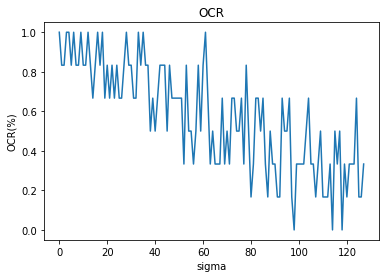

In [ ]:
N = 42
M= 144
sigma=np.arange(0,128)
D = np.zeros([len(sigma),42,144])
OCR = np.zeros(len(sigma))

C_degraded=np.zeros([N,M])
for n in range(len(sigma)):
  C_degraded = C+sigma[n]*np.random.randn(N,M)
  C_degraded[C_degraded>255]=255
  C_degraded[C_degraded<0]=0
  match_str= match_chars(C_degraded,template)
  D[n] = C_degraded
  OCR[n]=float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str)
plt.plot(np.arange(len(sigma)),OCR)


index83 = np.zeros(len(OCR))
index50 = np.zeros(len(OCR))

for j in range(len(sigma)):
  if ( np.round(OCR[j],2) == 0.83):
    index83[j]=j
  if ( np.round(OCR[j],2) == 0.50):
    index50[j]=j
maxsig83 = np.max(index83)
maxsig50 = np.max(index50)
print("Max 83% Accuracy Occurs at Sigma = ",maxsig83)
print("Max 50% Accuracy Occurs at Sigma = ",maxsig50)
plt.title("OCR")
plt.xlabel("sigma")
plt.ylabel("OCR(%)")

From the plot I can see that the when sigma increase, the accuarcy of the image is decreased. The plot tends to bounce back and fourth in terms of OCR%, and this is due to the random nature of the noise. Sometimes the noise cooperates in a way that allows the function to detect the right string, and sometimes the opposite case happensand the accuarcy is greatly decreased.

## ***Part d-iii:*** In this section I chose a few values and display them.

<Figure size 432x288 with 0 Axes>

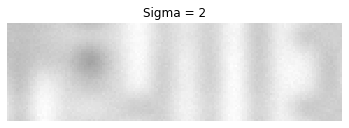

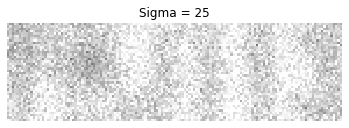

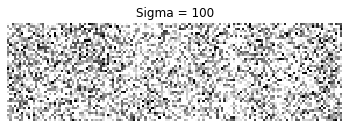

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.title("Sigma = 2")
img=plt.imshow(D[2], cmap='gray',vmin=0,vmax=255); plt.axis('off')
plt.figure()

plt.title("Sigma = 25")
img=plt.imshow(D[25], cmap='gray',vmin=0,vmax=255); plt.axis('off')
plt.figure()

plt.title("Sigma = 100")
img=plt.imshow(D[100], cmap='gray',vmin=0,vmax=255); plt.axis('off')
plt.figure()

As sigma increases, it is clear to see the effects of the noise of the image. As simga increases the edges of the letters start to blend in with the the rest of the image. As sigma hits the max the image is more or less pure noise with some dark spots where the letters are.

## ***Part d-iv:*** In this section I print out the maximum sigma that is 100% accurate and discuss the general trends of additive noise.

Max 100% Accuracy Occurs at Sigma =  61.0


<Figure size 432x288 with 0 Axes>

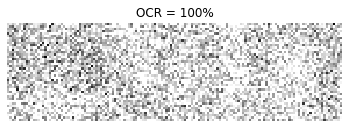

<Figure size 432x288 with 0 Axes>

In [ ]:
index100 = np.zeros(len(OCR))

for j in range(len(sigma)):
  if ( np.round(OCR[j],2) == 1):
    
    index100[j]=j
maxsig100 = np.max(index100)
print("Max 100% Accuracy Occurs at Sigma = ",maxsig100)
D100=D[int(maxsig100)]
plt.title("OCR = 100%")
img=plt.imshow(D100, cmap='gray',vmin=0,vmax=255); plt.axis('off')
plt.figure()

The maximum sigma value is specified above, I left it in a print statement so it would still be correct on re-runs of the code. As the standard devation increases the range of intensities also changes. I can tell this because in the image for sigma = 2 the values are mostly gray to white, there is not much in the way of blacks. Once we get down to 100, the image has a lot more black values due to the noise have a much larger range of values. Applying this noise to A would be very different because the image is black on white so the edges are much more defined and resillant to noise. 

## ***Part d-v:*** In this section I print out the maximum 83% OCR image.

Max 83% Accuracy Occurs at Sigma =  78.0
MSE of Plate =  15573.01
OCR Accuracy =  83.33 %


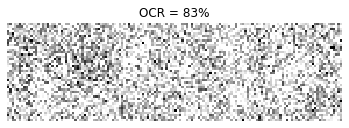

<Figure size 432x288 with 0 Axes>

In [ ]:
for j in range(len(sigma)):
  if ( np.round(OCR[j],2) == 0.83):
    index83[j]=j
maxsig83 = np.max(index83)


plt.title("OCR = 83%")
D83=D[int(maxsig83)]
MSE_83 = np.sum((D83-A)**2)/(N*M)
img=plt.imshow(D83, cmap='gray',vmin=0,vmax=255); plt.axis('off')
match_str= match_chars(D83,template)

plt.figure()
print("Max 83% Accuracy Occurs at Sigma = ",maxsig83)
print("MSE of Plate = ", np.round(np.sum((D83-A)**2)/(N*M),2))
print("OCR Accuracy = ",np.round(100*float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str),2),"%")

## ***Part d-vi:*** In this section I print out the maximum 50% OCR image

Max 50% Accuracy Occurs at Sigma =  117.0
MSE of Plate =  17470.38
OCR Accuracy =  50.0 %


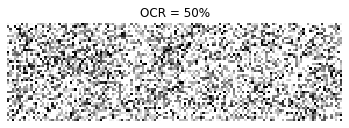

<Figure size 432x288 with 0 Axes>

In [ ]:
for j in range(len(sigma)):
  if ( np.round(OCR[j],2) == 0.50):
    index50[j]=j
D50=D[int(maxsig50)]
match_str= match_chars(D50,template)
plt.title("OCR = 50%")
maxsig50 = np.max(index50)

img=plt.imshow(D50, cmap='gray',vmin=0,vmax=255); plt.axis('off')
plt.figure()
print("Max 50% Accuracy Occurs at Sigma = ",maxsig50)
print("MSE of Plate = ", np.round(np.sum((D50-A)**2)/(N*M),2))
print("OCR Accuracy = ",np.round(100*float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str),2),"%")

# **(e) Enhance:**

## ***Part e-i:*** In this section I enchance D83 to reach the highest accuracy I am able to. I split my thought process into two parts, phase 1 and phase 2. Phase 1 was to test to see if the image responded to bluring or to sharpening better. The second phase was trying to further clean up the image using averaging and or sharpening to see if the image was legible.

### ***Phase I:*** The first thing I wanted to know was if bluring or sharping the image would produce a more desirable effect. My instinct was blurring to reduce some of the noise around. For the most part I was right, the image's lines have less noise but are not quite legible. My OCR accuracy did reach 100%, so mission accomplised on that aspect but I wanted it to be more visiable to the human eye. Lapcian Sharpening degraded the image considerably so I threw that approach out for now. I think the Lapcian is too large of a kernal for this particular image.

Interpretation of Orginal =  PMJ111
Accuracy of Orginal =  83.0 %
Interpretation of Enchaced Image 1 (Blur)=  PMJ113
Accuracy of Enchaned Image 1=  100.0 %
Interpretation of Enchaced Image 2 (Lapacian Sharpen)=  2PZ1K4
Accuracy of Enchaned Image 2=  17.0 %


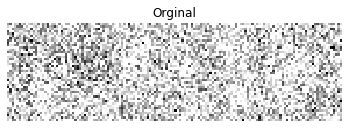

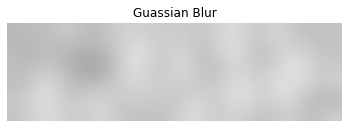

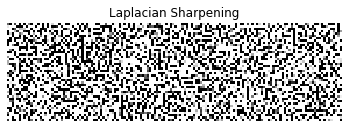

In [ ]:
plt.title("Orginal")
img=plt.imshow(D83, cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max); plt.axis('off')
plt.figure()
match_str= match_chars(D83,template)

print("Interpretation of Orginal = ",match_str)
print("Accuracy of Orginal = " ,np.round(100*float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str)),"%")

Dblur = ndimage.filters.gaussian_filter(D83,5,truncate=2)
plt.title("Guassian Blur")

plt.imshow(Dblur,cmap='gray',vmin=0,vmax=255);plt.axis('off')
plt.figure()

w = np.array(([-1,-1,-1],[-1,8,-1],[-1,-1,-1]))
Im4=ndimage.convolve(D83,w)
sharp = D83 + 1*Im4
plt.title("Laplacian Sharpening")
img=plt.imshow(sharp, cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max); plt.axis('off')

match_str= match_chars(Dblur,template)
print("Interpretation of Enchaced Image 1 (Blur)= ",match_str)
print("Accuracy of Enchaned Image 1= " ,np.round(100*float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str)),"%")

match_str= match_chars(sharp,template)
print("Interpretation of Enchaced Image 2 (Lapacian Sharpen)= ",match_str)
print("Accuracy of Enchaned Image 2= " ,np.round(100*float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str)),"%")
# plt.axis('off')
# plt.title('Local Histogram Equalization')
# img=plt.imshow(D83, cmap='gray',vmin=np.amin(RD83),vmax=np.amax(RD83)); plt.axis('off')
# match_str= match_chars(RD83,template)
# print(match_str)
# print(float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str))

Gray areas are concentrated around where the letters should be. If you know what you are looking for and you squint hard enough you can see the outlines. I would perfer if the edges where more pronounced. 

### ***Phase II:*** The first thing that I wanted to try was averaging the image together with itself in order to reduce more noise because I remeber the effects of doing this on a previous homework. It didn't quite have the effect I wanted, but it did darken the letters which was great. Afterward I try doing some high boost filtering, and I chose this because I wanted to try different values of K.

Interpretation =  PMJ113
Accuracy of Enchaned Image 1 =  100.0 %
PMJ113
Interpretation =  PMJ113
Accuracy of Enchaned Image 2 =  100.0 %


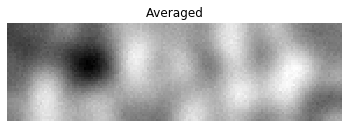

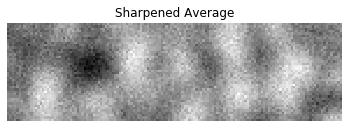

In [ ]:
D83=D83.astype(float)
RD83=np.zeros([N,M]).astype(float)


for k in range(0,10000):
  RD83 = RD83 + Dblur+maxsig83*np.random.randn(N,M)
RD83 = RD83/10000

plt.title("Averaged")

img=plt.imshow(RD83, cmap='gray'); plt.axis('off')
match_str= match_chars(RD83,template)
print("Interpretation = ",match_str)
print("Accuracy of Enchaned Image 1 = " ,np.round(100*float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str),2),"%")
plt.figure()
plt.title("Sharpened Average")

ED83 = RD83-ndimage.filters.gaussian_filter(RD83,3,truncate=2)
Unsharp = RD83+6*ED83
img=plt.imshow(Unsharp, cmap='gray'); plt.axis('off')
match_str= match_chars(Unsharp,template)
print(my_str)
print("Interpretation = ",match_str)
print("Accuracy of Enchaned Image 2 = " ,np.round(100*float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str),2),"%")

In [ ]:
MSE_1 = np.sum((D83-A)**2)/(N*M)
MSE_2 = np.sum((Unsharp-A)**2)/(N*M)
print("MSE of D83 = ", np.round(MSE_1,2))
print("MSE of Enchanced Image = ", np.round(MSE_2,2))

MSE of D83 =  15573.01
MSE of Enchanced Image =  12274.05


MSE was reduced by a consideral amount, and I belive that if you know that you are looking for my image is somewhat legiable. I'm more happy with what J113 look like, but my P and M are pretty bad, and I think it is due to the shape of the letters being more complex so the noise is much more pronounced.

### ***Part e-ii:*** In this secton I attempt to enchance the image D50. I wanted to focus more so on what worked last time, bluring, averaging and sharpening that image. I tried different combination of blurring and averaging but nothing seem to come out as desired. I knew that I wanted to start with averaging this time so I could have the lines be more visible from the start of the process. This kind of paid off but its still pretty rough. Blurring and averaging from there gave me mostly the same results.

Interpretation =  PMJ3X1
Accuracy of Enchaned Image 1 =  50.0 %
Interpretation =  PMJ31J
Accuracy of Enchaned Image 1=  66.67 %
Interpretation =  PMJ31J
Accuracy of Enchaned Image 1 =  66.67 %
Interpretation =  PMJ31J
Accuracy of Enchaned Image 3 =  66.67 %


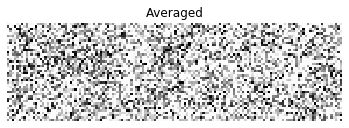

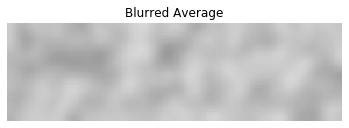

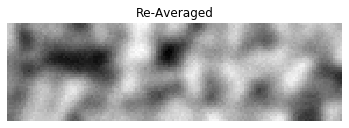

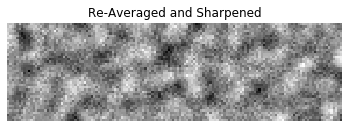

<Figure size 432x288 with 0 Axes>

In [ ]:
D50=D50.astype(float)
RD50=np.zeros([N,M]).astype(float)


for k in range(0,10000):
  RD50 = RD50 + D50+maxsig50*np.random.randn(N,M)
RD50 = RD50/10000


plt.title("Averaged")

img=plt.imshow(RD50, cmap='gray'); plt.axis('off')
match_str= match_chars(RD50,template)
print("Interpretation = ",match_str)
print("Accuracy of Enchaned Image 1 = " ,np.round(100*float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str),2),"%")
plt.figure()

Dblur = ndimage.filters.gaussian_filter(RD50,3,truncate=3)
plt.title("Blurred Average")

plt.imshow(Dblur,cmap='gray',vmin=0,vmax=255);plt.axis('off')
plt.figure()
match_str= match_chars(Dblur,template)
print("Interpretation = ",match_str)
print("Accuracy of Enchaned Image 1= " ,np.round(100*float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str),2),"%")


RD50=np.zeros([N,M]).astype(float)
for k in range(0,10000):
  RD50 = RD50 + Dblur+maxsig50*np.random.randn(N,M)
RD50 = RD50/10000


plt.title("Re-Averaged")

img=plt.imshow(RD50, cmap='gray'); plt.axis('off')
match_str= match_chars(RD50,template)
print("Interpretation = ",match_str)
print("Accuracy of Enchaned Image 1 = " ,np.round(100*float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str),2),"%")
plt.figure()
plt.title("Re-Averaged and Sharpened")

ED50 = RD50-ndimage.filters.gaussian_filter(RD50,2,truncate=2)
Unsharp = RD50+3*ED50
img=plt.imshow(ED50, cmap='gray'); plt.axis('off')
plt.figure()
match_str= match_chars(Unsharp,template)
print("Interpretation = ",match_str)
print("Accuracy of Enchaned Image 3 = " ,np.round(100*float([x==y for(x, y) in zip(my_str,match_str)].count(True))/len(my_str),2),"%")



I tried techniques from before, mostly focusing on bluring, averaging and sharping. No matter what I tried I couldn't break 66.6%. I'm confident that this is the best I could do with the tools that I had. The images are most definatly not legible, and my accuracy always sits at 66.6%

In [ ]:
MSE_1 = np.sum((D50-A)**2)/(N*M)
MSE_2 = np.sum((RD50-A)**2)/(N*M)
print("MSE of D50 = ", np.round(MSE_1,2))
print("MSE of Enchanced Image = ", np.round(MSE_2,2)).


MSE of D50 =  17470.38
MSE of Enchanced Image =  12155.29


The MSE is alot better for the image.